In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
np.random.seed(104729)

In [2]:
class CNNModel:
    def convolution_layer(self,inp, F, K):
        kernels = list()
        feature_maps = list()
        feature_dim_w = (inp.shape[0] - F ) + 1
        feature_dim_h = (inp.shape[1] - F ) + 1
        for i in range(0,K):
            kernels.append(np.random.rand(F,F,inp.shape[2]))
            feature_maps.append(np.zeros((feature_dim_w,feature_dim_h)))
    
        for d in range(0,K):
            start_i = 0
            end_i = start_i + kernels[d].shape[0]
    
            for f_i in range(0,feature_dim_w):
                start_j = 0
                end_j = start_j + kernels[d].shape[0]
                for f_j in range(0, feature_dim_h):
                    val = 0
                    k_i = 0
                    for img_i in range(start_i,end_i):
                        k_j = 0
                        for img_j in range(start_j, end_j):
                            k_k = 0
                            for img_k in range(0,inp.shape[2]):
                                val +=  inp[img_i][img_j][img_k]*kernels[d][k_i][k_j][k_k]
                                k_k += 1
                            k_j += 1
                        k_i += 1
                    feature_maps[d][f_i][f_j] = val
                    start_j += 1
                    end_j += 1
                start_i += 1
                end_i += 1
    
        return feature_maps
        
    def max_pooling_layer(self,inp,F,S):
        out = None
        if(len(inp)==0):
            return None
        out_dim_w = ((inp[0].shape[0] - F)/S) + 1
        out_dim_h = ((inp[0].shape[1] - F)/S) + 1
            
        for conv in inp:
            max_pool = np.zeros((out_dim_w,out_dim_h))
            start_i = 0
            end_i = start_i + F
            for m_i in range(0,out_dim_w):
                start_j = 0
                end_j = start_j + F
                for m_j in range(0, out_dim_h):
                    val = -np.inf
                    for conv_i in range(start_i,end_i):
                        for conv_j in range(start_j, end_j):
                            if conv[conv_i][conv_j] > val:
                                val = conv[conv_i][conv_j]
                    max_pool[m_i][m_j] = val
                    start_j += S
                    end_j += S
                start_i += S
                end_i += S
            if out is None:
                out = max_pool
            else:
                out = np.dstack((out,max_pool))
        return out
    
    def DenseLayer(self,inp,n_neurons):
        W = np.random.rand(inp.shape[1],n_neurons)
        b = np.random.rand(1,n_neurons)
        return np.dot(inp,W) + b
    
    def ActivationLayer(self,inp,activation_function):
        if activation_function == 'relu':
            return np.maximum(inp,0)
        if activation_function == 'softmax':
            z = np.exp(inp - inp.max())
            deno = z.sum()
            s = np.divide(z,deno)
            return s
        return inp

In [3]:
im = cv2.imread('dog_large.jpg')
im = im/255

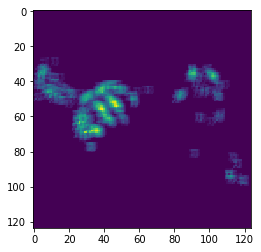

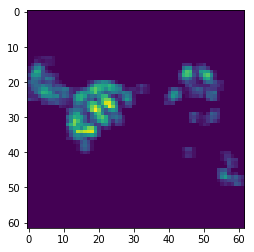

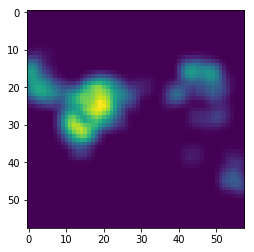

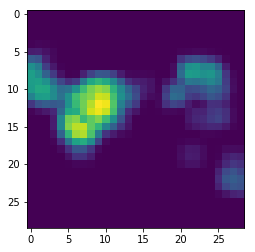

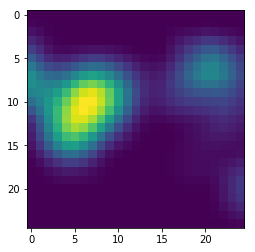

In [4]:
model = CNNModel()
conv_out1 = model.convolution_layer(im,5,6)

plt.imshow(conv_out1[0])
plt.show()

max_pool_out1 = model.max_pooling_layer(conv_out1,2,2)
max_pool_out1 = model.ActivationLayer(max_pool_out1,'relu')

plt.imshow(max_pool_out1[:,:,0])
plt.show()

conv_out2 = model.convolution_layer(max_pool_out1,5,16)

plt.imshow(conv_out2[0])
plt.show()

max_pool_out2 = model.max_pooling_layer(conv_out2,2,2)
max_pool_out2 = model.ActivationLayer(max_pool_out2,'relu')

plt.imshow(max_pool_out2[:,:,0])
plt.show()

conv_out3 = model.convolution_layer(max_pool_out2,5,120)

plt.imshow(conv_out3[0])
plt.show()

flat_vec = np.array(conv_out3).flatten()
flat_vec = np.reshape(flat_vec,(1,flat_vec.shape[0]))

dense2 = model.DenseLayer(flat_vec,84)
activation2 = model.ActivationLayer(dense2,'relu')

dense3 = model.DenseLayer(activation2,10)

output = model.ActivationLayer(dense3,'softmax')

In [5]:
print output

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
